Source: https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db

In [3]:
import pandas as pd, numpy as np, time
from sklearn.model_selection import train_test_split

data = pd.read_csv("flights.csv/flights.csv")
data = data.sample(frac = 0.1, random_state=10)

C:\Users\snerur\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3106: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
411984,2015,1,28,3,WN,103,N7728D,DCA,MKE,705,...,811.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3591965,2015,8,11,2,B6,153,N592JB,JFK,PBI,1859,...,345.0,337.0,0,0,NaN,0.0,0.0,82.0,255.0,0.0
526451,2015,2,4,3,DL,1187,N921DN,MSP,DCA,1735,...,2043.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1336011,2015,3,27,5,WN,171,N407WN,DEN,RDU,1815,...,2313.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3424502,2015,8,1,6,WN,4330,N7751A,ATL,RIC,2125,...,2318.0,13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data = data[["MONTH","DAY","DAY_OF_WEEK","AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT",
                 "ORIGIN_AIRPORT","AIR_TIME", "DEPARTURE_TIME","DISTANCE","ARRIVAL_DELAY"]]
data.dropna(inplace=True)

In [11]:
data["ARRIVAL_DELAY"] = (data["ARRIVAL_DELAY"]>10)*1

cols = ["AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT","ORIGIN_AIRPORT"]
for item in cols:
    data[item] = data[item].astype("category").cat.codes +1

In [12]:
data.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,DESTINATION_AIRPORT,ORIGIN_AIRPORT,AIR_TIME,DEPARTURE_TIME,DISTANCE,ARRIVAL_DELAY
411984,1,28,3,14,102,717,608,102.0,713.0,634,0
3591965,8,11,2,3,152,748,690,134.0,111.0,1028,1
526451,2,4,3,4,1184,597,740,111.0,1734.0,931,0
1336011,3,27,5,14,170,770,609,173.0,1807.0,1436,0
3424502,8,1,6,14,4321,772,544,63.0,2151.0,481,1


In [13]:
X = data.drop(["ARRIVAL_DELAY"], axis=1)
y = data['ARRIVAL_DELAY']

In [14]:
train, test, y_train, y_test = train_test_split(X, y, random_state=108, test_size=0.25)

XGBoost - a very popular algorithm

In [15]:
import xgboost as xgb
from sklearn import metrics

def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))


In [16]:
# Parameter Tuning
model = xgb.XGBClassifier()
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16]}

In [18]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1)
grid_search.fit(train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\Users\snerur\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:44:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.16],
                         'max_depth': [10, 30, 50],
                         'min_child_weight': [1, 3, 6], 'n_estimators': [200]},
             verbose=10)

In [19]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=50, min_child_weight=6, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [20]:
model = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
                          n_jobs=-1 , verbose=1,learning_rate=0.16)
model.fit(train,y_train)

auc(model, train, test)

[21:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(1.0, 0.7901048964784734)

LightGBM ---> Another good algorithm

In [21]:
import lightgbm as lgb
from sklearn import metrics

def auc2(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict(train)),
                            metrics.roc_auc_score(y_test,m.predict(test)))

In [22]:
""" Unquote to use grid search for finding the best estimator

lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
grid_search.fit(train,y_train)
grid_search.best_estimator_



"""

' Unquote to use grid search for finding the best estimator\n\nlg = lgb.LGBMClassifier(silent=False)\nparam_dist = {"max_depth": [25,50, 75],\n              "learning_rate" : [0.01,0.05,0.1],\n              "num_leaves": [300,900,1200],\n              "n_estimators": [200]\n             }\ngrid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)\ngrid_search.fit(train,y_train)\ngrid_search.best_estimator_\n\nd_train = lgb.Dataset(train, label=y_train)\n\n'

In [23]:
d_train = lgb.Dataset(train, label=y_train)
params = {"max_depth": 50, "learning_rate" : 0.1, "num_leaves": 900,  "n_estimators": 300}

# Without Categorical Features
model2 = lgb.train(params, d_train)
auc2(model2, train, test)

C:\Users\snerur\Anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1525
[LightGBM] [Info] Number of data points in the train set: 428504, number of used features: 10
[LightGBM] [Info] Start training from score 0.219480


(0.9813694362488364, 0.7843835232115273)

In [27]:
#With Catgeorical Features
cate_features_name = ["MONTH","DAY","DAY_OF_WEEK","AIRLINE","DESTINATION_AIRPORT",
                 "ORIGIN_AIRPORT"]
d_train = lgb.Dataset(train, label=y_train, categorical_feature=cate_features_name)

model2 = lgb.train(params, d_train, categorical_feature=cate_features_name)
auc2(model2, train, test)

C:\Users\snerur\Anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1894
[LightGBM] [Info] Number of data points in the train set: 428504, number of used features: 10
[LightGBM] [Info] Start training from score 0.219480


(0.9981140562594625, 0.7747054315090047)

CatBoost --- great for categorical features

In [28]:
import catboost as cb
cat_features_index = [0,1,2,3,4,5,6]

def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

In [ ]:
""" Uncomment to run grid search

params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}
cb = cb.CatBoostClassifier()
cb_model = GridSearchCV(cb, params, scoring="roc_auc", cv = 3)
cb_model.fit(train, y_train)
"""

In [32]:
#Without Categorical features
clf = cb.CatBoostClassifier(eval_metric="AUC", depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
clf.fit(train,y_train)
auc(clf, train, test)



0:	total: 60.3ms	remaining: 30.1s
1:	total: 114ms	remaining: 28.4s
2:	total: 171ms	remaining: 28.3s
3:	total: 232ms	remaining: 28.7s
4:	total: 294ms	remaining: 29.1s
5:	total: 355ms	remaining: 29.3s
6:	total: 411ms	remaining: 29s
7:	total: 465ms	remaining: 28.6s
8:	total: 525ms	remaining: 28.6s
9:	total: 587ms	remaining: 28.8s
10:	total: 642ms	remaining: 28.6s
11:	total: 694ms	remaining: 28.2s
12:	total: 753ms	remaining: 28.2s
13:	total: 811ms	remaining: 28.2s
14:	total: 861ms	remaining: 27.9s
15:	total: 916ms	remaining: 27.7s
16:	total: 966ms	remaining: 27.5s
17:	total: 1.02s	remaining: 27.4s
18:	total: 1.08s	remaining: 27.3s
19:	total: 1.13s	remaining: 27.1s
20:	total: 1.18s	remaining: 27s
21:	total: 1.24s	remaining: 26.9s
22:	total: 1.3s	remaining: 26.9s
23:	total: 1.35s	remaining: 26.8s
24:	total: 1.41s	remaining: 26.7s
25:	total: 1.46s	remaining: 26.6s
26:	total: 1.52s	remaining: 26.6s
27:	total: 1.57s	remaining: 26.4s
28:	total: 1.61s	remaining: 26.2s
29:	total: 1.67s	remaining: 

(0.8319216977350006, 0.7606839440461101)

In [33]:
#With Categorical features
clf = cb.CatBoostClassifier(eval_metric="AUC",one_hot_max_size=31, 
                            depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
clf.fit(train,y_train, cat_features= cat_features_index)
auc(clf, train, test)

0:	total: 285ms	remaining: 2m 22s
1:	total: 533ms	remaining: 2m 12s
2:	total: 773ms	remaining: 2m 8s
3:	total: 1.04s	remaining: 2m 8s
4:	total: 1.28s	remaining: 2m 6s
5:	total: 1.52s	remaining: 2m 5s
6:	total: 1.77s	remaining: 2m 4s
7:	total: 2.04s	remaining: 2m 5s
8:	total: 2.25s	remaining: 2m 2s
9:	total: 2.51s	remaining: 2m 2s
10:	total: 2.79s	remaining: 2m 4s
11:	total: 3.06s	remaining: 2m 4s
12:	total: 3.33s	remaining: 2m 4s
13:	total: 3.6s	remaining: 2m 5s
14:	total: 3.89s	remaining: 2m 5s
15:	total: 4.19s	remaining: 2m 6s
16:	total: 4.49s	remaining: 2m 7s
17:	total: 4.76s	remaining: 2m 7s
18:	total: 5.08s	remaining: 2m 8s
19:	total: 5.37s	remaining: 2m 8s
20:	total: 5.64s	remaining: 2m 8s
21:	total: 5.94s	remaining: 2m 9s
22:	total: 6.22s	remaining: 2m 9s
23:	total: 6.46s	remaining: 2m 8s
24:	total: 6.72s	remaining: 2m 7s
25:	total: 7.01s	remaining: 2m 7s
26:	total: 7.32s	remaining: 2m 8s
27:	total: 7.58s	remaining: 2m 7s
28:	total: 7.9s	remaining: 2m 8s
29:	total: 8.16s	remaini

(0.9076096017688642, 0.8349649997873602)

Using XGBoost DMatrix - more efficient memory and faster training

Source: https://debuggercafe.com/a-guide-to-xgboost-in-python/

In [35]:
# convert to DMatrix
d_train = xgb.DMatrix(train, y_train)
d_test = xgb.DMatrix(test, y_test)

In [44]:
params_1 = {
    'booster': 'gbtree',
    'max_depth': 50, 
    'learning_rate': 0.16,
    'sample_type': 'uniform',
    'normalize_type': 'tree',
    'objective': 'binary:hinge',
    'rate_drop': 0.1,
    'n_estimators': 300
}

In [45]:
xgb_clf = xgb.train(params_1, d_train)

[00:03:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimators", "normalize_type", "rate_drop", "sample_type" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [46]:
# make prediction
preds = xgb_clf.predict(d_test)
# print accuracy score
from sklearn.metrics import accuracy_score, f1_score
accuracy_score(y_test, preds)

0.7421150278293135

<Figure size 1152x864 with 0 Axes>

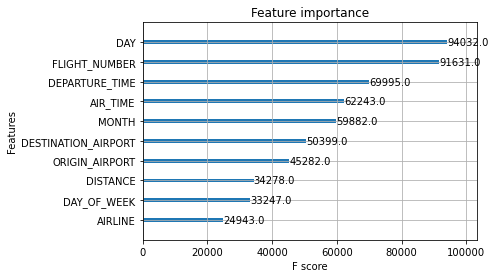

In [48]:

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 12))
xgb.plot_importance(xgb_clf)
plt.show()